## <font color='#607c8e'>Startup's Success Analysis</font>
<font color='#cb416b'>Data Science Foundation Program BootCamp<br/></font>
Raquel Câmara Porto

<b>Objective: Predicting the profit of a new Startup based on certain features and deciding whether one should invest in a particular startup or not.</b>

### <font color='#3c4142'>Graphical Analysis</font>

In [1]:
# importing from other notebooks
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

%run "./2º Exploratory Data Analysis (EDA).ipynb"
%run "./3º Model Building.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
(40, 6) (10, 6) (40,) (10,)
0.9610596256645947
0

First, let's see what the original data tell us about the startup's variables relationship.

<Figure size 800x640 with 0 Axes>

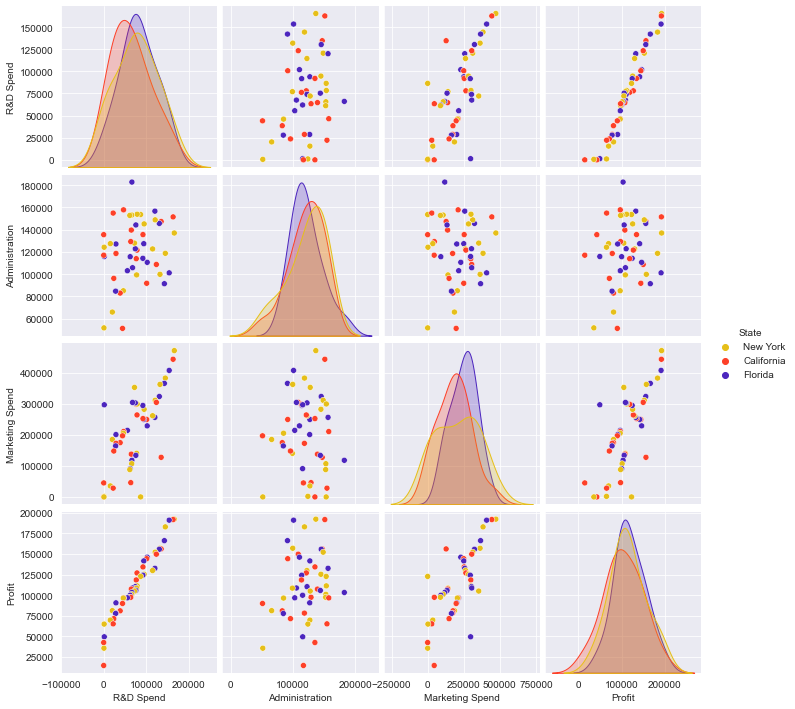

In [2]:
# Setting up the plotting
fig = plt.figure(figsize=(10,8), dpi=80)
sns.set_style('darkgrid')
sns.pairplot(data=data, hue="State", palette='CMRmap_r')

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Saving the plot
plt.savefig("plots/pairplot-original-data.png", dpi=300, bbox_inches='tight')
plt.show()

As we can see, none of the dependent variables have a linear relationship with each other. However, the profits seems to be directed affected by the total amount of money spent on <b>Research and Development</b> as well as the total amount of money spent on <b>Marketing</b>. As for the amount spent on Administration, there is no direct correlation with an increase in the profits of the startups.<br/>

Also, regarding the state where the startups operate, we can see that business located in Florida and New York have more profits than those located in California.<br/>

Now, we can go across the predictions from the models to see their efficiency on calculating the profits on new startups.

#### <font color='#3c4142'>Comparing the Decision Tree Model Results</font>

In [3]:
# Predicting the values for the DTR model
pred_test_DTR = DTR.predict(X_test)
pred_train_DTR = DTR.predict(X_train)

In [4]:
# RMSE for the entire dataset - for comparison purpose
rmse_dtr = (np.sqrt(mean_squared_error(target_vals, DTR.predict(features_vals))))
print('RMSE-original:', rmse_dtr)

# RMSE for the prediction on the testing dataset
rmse_dtr = (np.sqrt(mean_squared_error(Y_test, pred_test_DTR)))
print('RMSE-test:', rmse_dtr)

# RMSE for the prediction on the training dataset
rmse_dtr = (np.sqrt(mean_squared_error(Y_train, pred_train_DTR)))
print('RMSE-train:', rmse_dtr)

# Mean Absolut Error
mae_dtr = (np.mean(np.absolute(pred_test_DTR - Y_test)))
print('MAE:', mae_dtr)

RMSE-original: 7206.286367965983
RMSE-test: 6560.3762149402555
RMSE-train: 7358.910924928157
MAE: 5532.748250000002


As the profit mean on the original dataset is 112012.64, we can conclude that our Decision Tree model has about <b>5.0%</b> of mean absolute error comparing with the dataset original mean.

We can also see graphically how much of the predicted profits relates with the original profits.

In [5]:
# Turning the data into a new pandas Dataframe
DTR_df = pd.DataFrame()
DTR_df['pred_profit'] = pred_test_DTR
DTR_df['original_profit'] = Y_test
DTR_df.head()

,pred_profit,original_profit
0,112520.090000,105008.31
1,97714.287500,96479.51
2,87221.030000,78239.91
3,71064.157500,81229.06
4,183413.943333,191050.39


<Figure size 800x640 with 0 Axes>

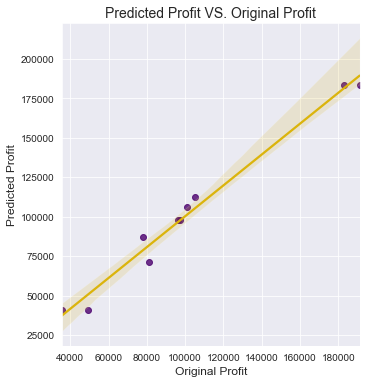

In [6]:
# Setting up the plotting
fig = plt.figure(figsize=(10,8), dpi=80)
sns.set_style('darkgrid')
sns.lmplot(data=DTR_df, x='original_profit', y='pred_profit',
           line_kws={'color': '#dbb40c'}, scatter_kws={'color': '#4b006e'})
sns.despine(right=False, top=False)

plt.title('Predicted Profit VS. Original Profit', fontsize=14)
plt.xlabel('Original Profit', fontsize=12)
plt.ylabel('Predicted Profit', fontsize=12)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Saving the plot
plt.savefig("plots/predicted-vs-original-DT.png", dpi=300, bbox_inches='tight')
plt.show()

Finally, to see how the errors are distribuited, we can plot a <b>Residual</b> plot.

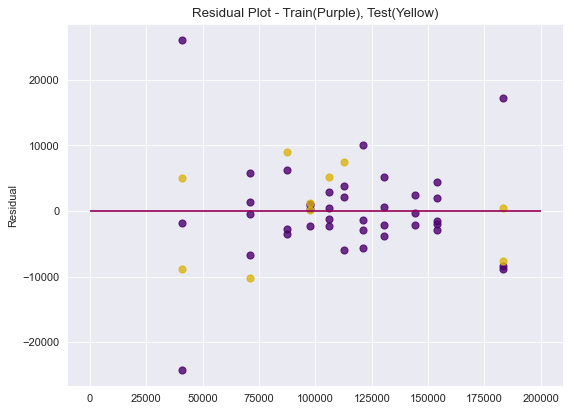

In [7]:
# Setting up the plotting
fig = plt.figure(figsize=(8,6), dpi=80)
plt.scatter(pred_train_DTR, pred_train_DTR - Y_train, c='#4b006e', s=40, alpha=0.8)
plt.scatter(pred_test_DTR, pred_test_DTR - Y_test, c='#dbb40c', s=40, alpha=0.8)

plt.hlines(y=0, xmin=0, xmax=200000, color='#960056')
plt.ylabel('Residual')
plt.title('Residual Plot - Train(Purple), Test(Yellow)')

# Saving the plot
plt.savefig("plots/residual-plot-DT.png", dpi=300, bbox_inches='tight')
plt.show()

#### <font color='#3c4142'>Comparing the Random Forest Model Results</font>

In [8]:
# Predicting the values for the DTR model
pred_test_RF = RF.predict(X_test)
pred_train_RF = RF.predict(X_train)

In [9]:
# RMSE for the entire dataset - for comparison purpose
rmse_rf = (np.sqrt(mean_squared_error(target_vals, RF.predict(features_vals))))
print('RMSE1-original:', rmse_rf)

# RMSE for the prediction on the testing dataset
rmse_rf = (np.sqrt(mean_squared_error(Y_test, pred_test_RF)))
print('RMSE2-test:', rmse_rf)

# RMSE for the prediction on the training dataset
rmse_rf = (np.sqrt(mean_squared_error(Y_train, pred_train_RF)))
print('RMSE-train:', rmse_rf)

# Mean Absolut Error
mae_rf = (np.mean(np.absolute(pred_test_RF - Y_test)))
print('MAE:', mae_rf)

RMSE1-original: 6539.582084773609
RMSE2-test: 8542.21334860352
RMSE-train: 5934.2493275139595
MAE: 6259.642370170261


As the profit mean on the original dataset is 112012.64, we can conclude that our Decision Tree model has about <b>5.6%</b> of mean absolute error comparing with the dataset original mean.

We can also see graphically how much of the predicted profits relates with the original profits.

In [10]:
# Turning the data into a new pandas Dataframe
RF_df = pd.DataFrame()
RF_df['pred_profit'] = pred_test_RF
RF_df['original_profit'] = Y_test
RF_df.head()

,pred_profit,original_profit
0,109810.450921,105008.31
1,98090.333991,96479.51
2,80746.492634,78239.91
3,80506.993421,81229.06
4,185406.238704,191050.39


<Figure size 800x640 with 0 Axes>

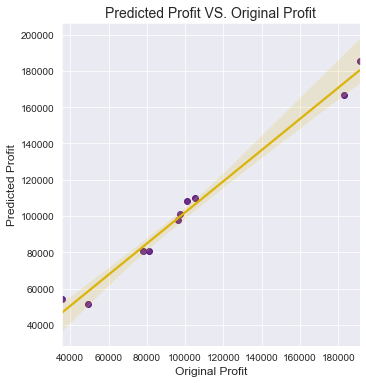

In [11]:
# Setting up the plotting
fig = plt.figure(figsize=(10,8), dpi=80)
sns.set_style('darkgrid')
sns.lmplot(data=RF_df, x='original_profit', y='pred_profit',
           line_kws={'color': '#dbb40c'}, scatter_kws={'color': '#4b006e'})
sns.despine(right=False, top=False)

plt.title('Predicted Profit VS. Original Profit', fontsize=14)
plt.xlabel('Original Profit', fontsize=12)
plt.ylabel('Predicted Profit', fontsize=12)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Saving the plot
plt.savefig("plots/predicted-vs-original-RF.png", dpi=300, bbox_inches='tight')
plt.show()

Finally, to see how the errors are distribuited, we can plot a <b>Residual</b> plot.

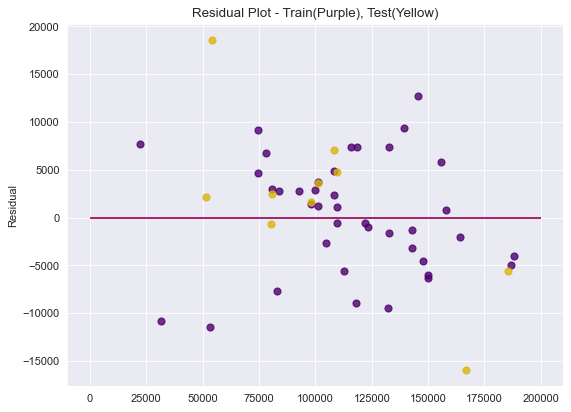

In [12]:
# Setting up the plotting
fig = plt.figure(figsize=(8,6), dpi=80)
plt.scatter(pred_train_RF, pred_train_RF - Y_train, c='#4b006e', s=40, alpha=0.8)
plt.scatter(pred_test_RF, pred_test_RF - Y_test, c='#dbb40c', s=40, alpha=0.8)

plt.hlines(y=0, xmin=0, xmax=200000, color='#960056')
plt.ylabel('Residual')
plt.title('Residual Plot - Train(Purple), Test(Yellow)')

# Saving the plot
plt.savefig("plots/residual-plot-RF.png", dpi=300, bbox_inches='tight')
plt.show()